# Masterclass Unsupervised analysis
## Hands on session 2 - Clustering algorithms
#### IenW | Data en Innovatielab | Oct 2024

Clustering is the process of grouping samples which is then used to determine the "natural" or "data driven" groupings in the data set. If clusters emerge, their properties can be summarized. Although various clustering methods can produce a partitioning of the samples in the data set, different methods yields in different groupings since each implicitly imposes a structure on the data.

In this notebook we will generate data sets, and experiment with various clustering algorithms, such as hierarchical, k-means, DBSCAN.

<center><br><b>Clustering summary:</b></center>
<img src="./img/cluster_info.png",width=750,height=750>


<center>http://scikit-learn.org/stable/modules/clustering.html</center>


<h2>Hierarchical clustering</h2>
<h3>The algorithm</h3>

Hierarchical clustering groups data over a variety of scales by creating a cluster tree or dendrogram. The tree is not a single set of clusters, but rather a multilevel hierarchy, where clusters at one level are joined as clusters at the next level. This allows you to decide the level or scale of clustering that is most appropriate for your application.

<br>
Hierarchical clustering is based on three major steps:
1.	Finding the similarity or dissimilarity between every pair of objects in the data set.  In this step, you calculate the distance between objects.
2.	Grouping the objects into a binary, hierarchical cluster tree (dendrogram).  In this step, you link pairs of objects that are in close proximity (have a high similarity) using different linkage methods. The linkage method uses the distance information generated in step 1 to determine the similarity of objects to each other. As objects are paired into binary clusters, the newly formed clusters are grouped into larger clusters until a hierarchical tree is formed
3.	Determine where to cut the hierarchical tree into clusters. In this step the obtained dendrogram is analyzed in order to decide which cutting level best suits the data.



### Building the dendrogram – Linkage methods
Once the dissimilarity between objects in the data set has been computed, you can determine how objects in the data set should be grouped into clusters by choosing one of the linkage methods.

Python function dendrogram takes the distance information generated by dist and links pairs of objects that are close together into binary clusters. The linkage function then links these newly formed clusters to each other and to other objects to create bigger clusters until all objects in the original data set are linked together in a hierarchical tree.


In [4]:
!pip install clusteval
!pip install scatterd
!pip install d3blocks
!pip install sckit-datasets

ERROR: Could not find a version that satisfies the requirement sckit-datasets (from versions: none)
ERROR: No matching distribution found for sckit-datasets


In [6]:
# Libraries
import sys, os
#sys.path.append(os.path.join(os.getcwd(), "../src/"))
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs, make_circles
from scipy.cluster.hierarchy import inconsistent

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from clusteval import clusteval
from scatterd import scatterd


[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Messy data'}, xlabel='x-axis', ylabel='y-axis'>)

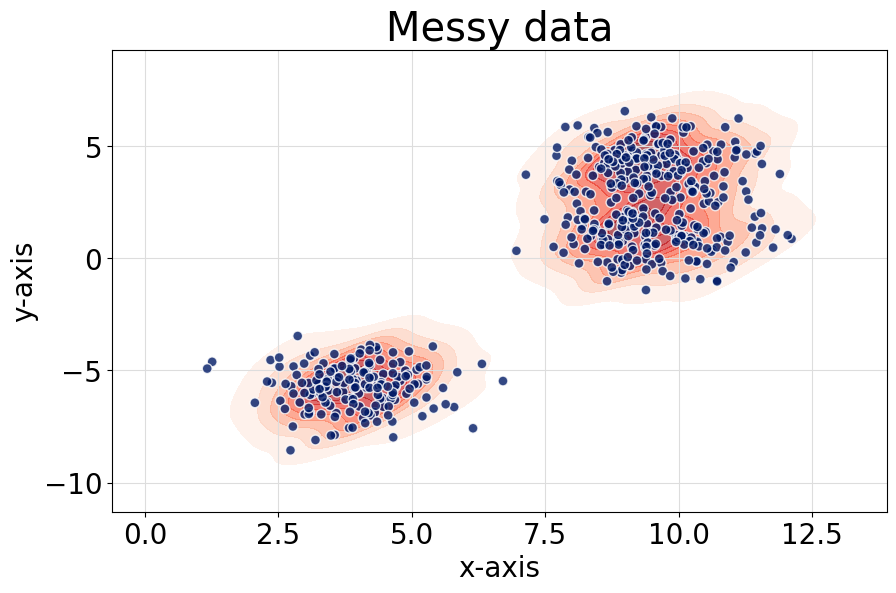

In [32]:
# Generate MESSY data.

# This particular setting has one distinct cluster and 3 clusters placed close together.
X, labx = make_blobs(n_samples=500, n_features=2, centers=3, random_state=4)

# Scatter the dots
scatterd(X[:,0],X[:,1],
         figsize=(10, 6),
         title='Messy data',
         s=50,
         density=True,
         cmap='Set1',
         grid=True,
         #labels=labx,
         edgecolor='#FFFFFF',
         #gradient='#ffffff',
         )


### EXERCISE 2
What is the optimal number of clusters based on the scatter plot?

a) 2
<br>
b) 10
<br>
c) 3

[clustimage] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Add transparency to RGB colors (last column)
[clusteval] >INFO> Set alpha based on density because of the parameter: [opaque]
[clusteval] >INFO> Add density layer
[clusteval] >INFO> Create scatterplot


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Messy data'}, xlabel='x-axis', ylabel='y-axis'>)

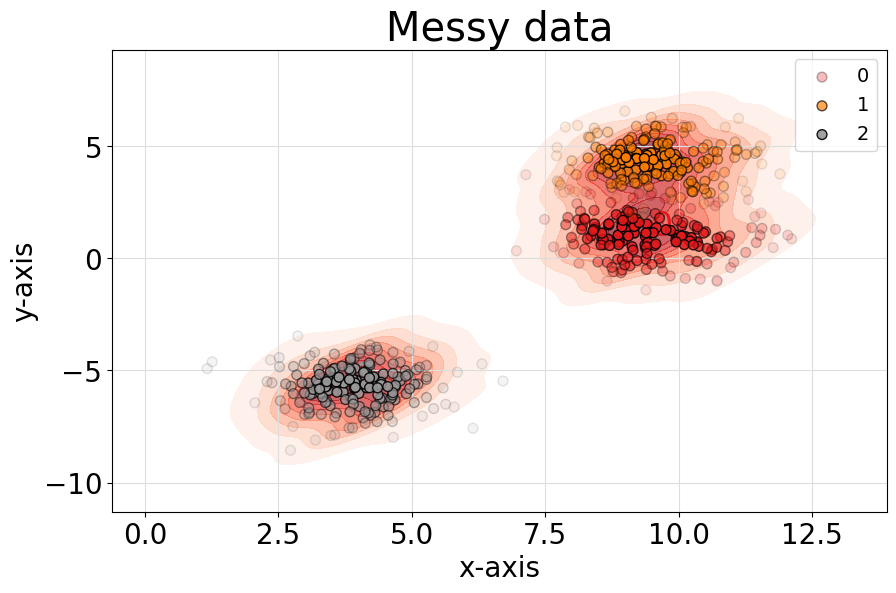

In [33]:
# ANSWER: Scatter with the real labx
scatterd(
         x=X[:,0],
         y=X[:,1],
         figsize=(10, 6),
         title='Messy data',
         s=50,
         density=True,
         cmap='Set1',
         grid=True,
         labels=labx,
         #edgecolor='#FFFFFF',
         #gradient='#ffffff',
         )

In [67]:
# Load d3blocks
from d3blocks import D3Blocks

# Initialize
d3 = D3Blocks()

# Scatter plot
d3.scatter(
    X[:,0],
    X[:,1],
    notebook=True,
    cmap='Set1',
    figsize=(800,600),
    title='Messy data',
    color=labx.astype(str),
    c_gradient=None,
    size=5,
)

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Scatter]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/scatter.html]
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> File already exists and will be overwritten: [/tmp/d3blocks/scatter.html]
[d3blocks] >INFO> Display in notebook using IPython.


### EXERCISE 3

Inspect the dendrogram with respect to the distances calculated earlier. Can you reconstruct the distances between the data points from dendrogram? The purpose of this exercise is to get you acquainted with clustering gain insight in the different parameters that you can set.

##### Complete link method
This method defines the distance between two groups as the distance between their two farthest-apart members. This method usually yields clusters that are well separated and compact.

##### Average link method
This algorithm defines the distance between groups as the average distance between each of the members, weighted so that the two groups have an equal influence on the final result.

##### Single link method
The distance between two groups is defined as the distance between their two closest members.


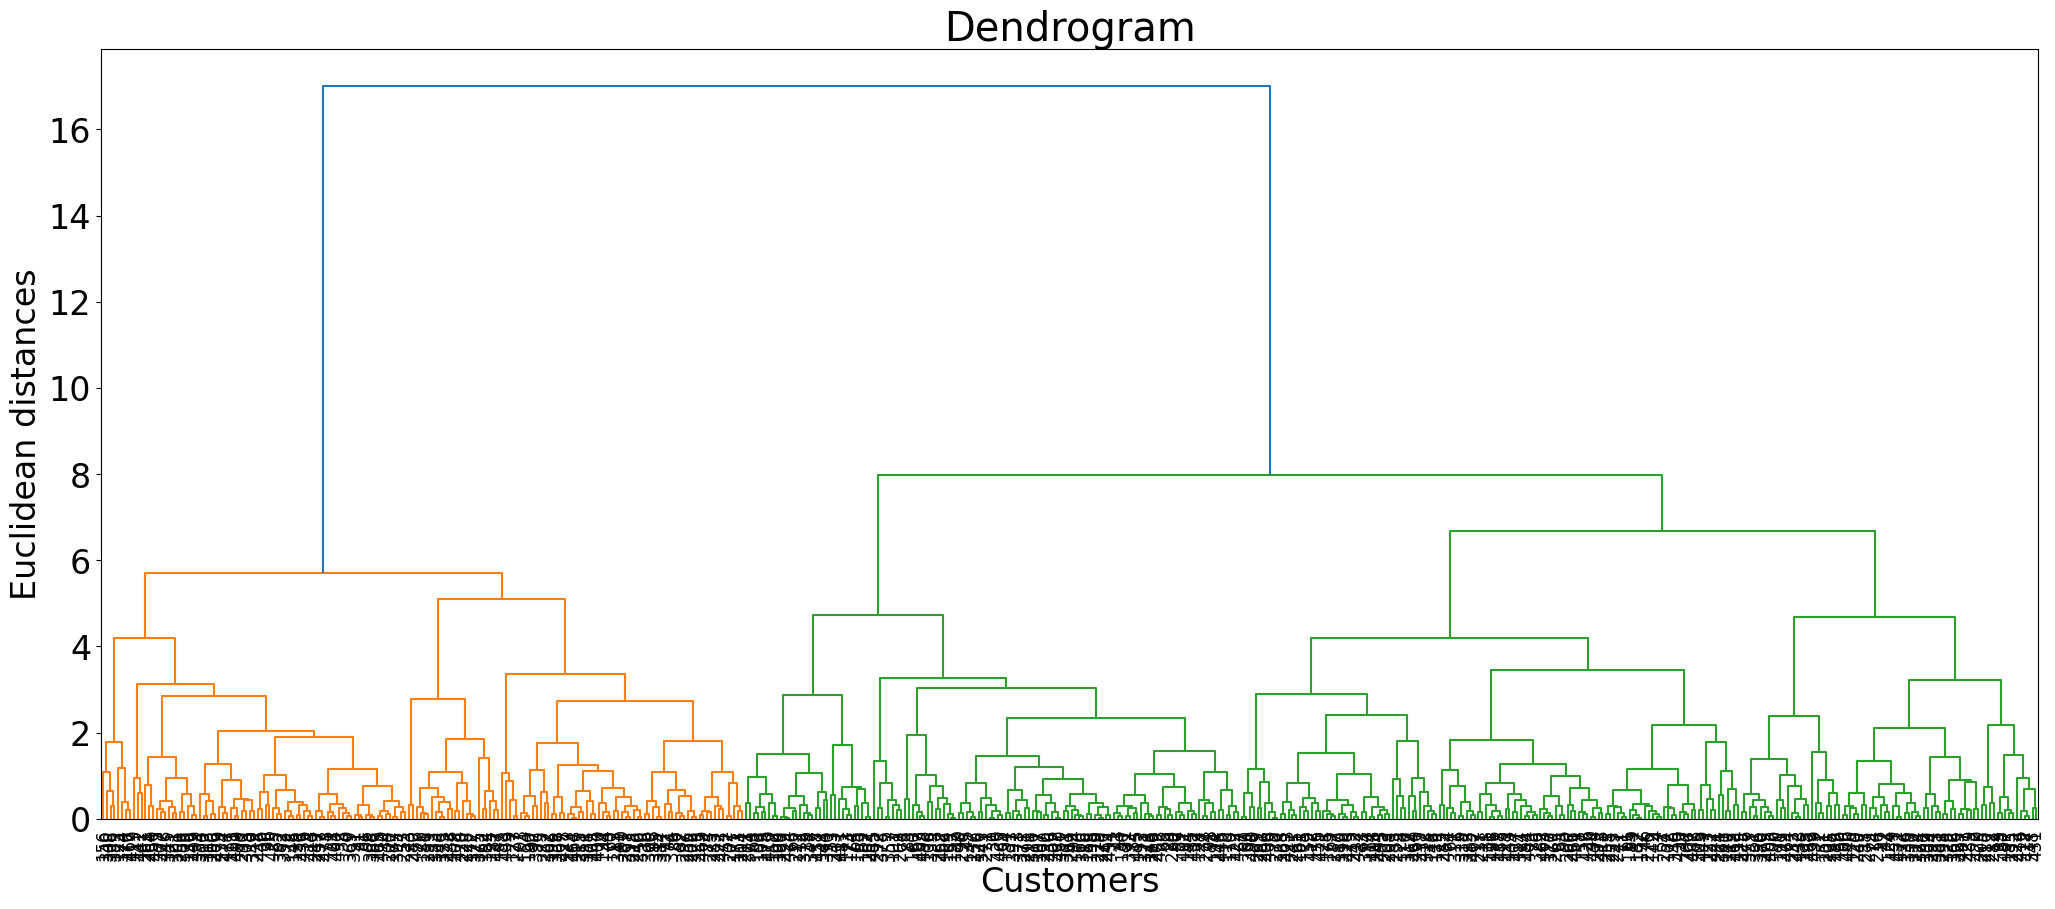

In [71]:
# Using the dendrogram to find the optimal number of clusters
# 'complete'
# 'average'
# 'single'
# 'ward'
Z=linkage(X, method='complete', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(Z,leaf_font_size=12)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# On the x axis you see labels. If you don't specify anything else they are the indices of your samples in X.
# On the y axis you see the distances (of the 'complete' method in our case).


### EXERCISE 4
The messy dataset shows three noisy clusters that are almost overlapping. Which linkage works best to obtain the two underlying noisy clusters?

a) single
<br>
b) complete
<br>
c) average

### EXERCISE 5
Hierarchical clustering produces a dendrogram. To give the desired number of clusters, the tree can be cut at a desired horizontal level. The number of vertical stems of the dendrogram intersected by the horizontal line, corresponds to the number of clusters. A scatterplot of the samples, colour-coded by cluster membership, reveals the clustering (note that when there are more than two features in the dataset, the clustering is performed taking all features into account, but that only the first two features are displayed).


In [73]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def dendrogram_fancy(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

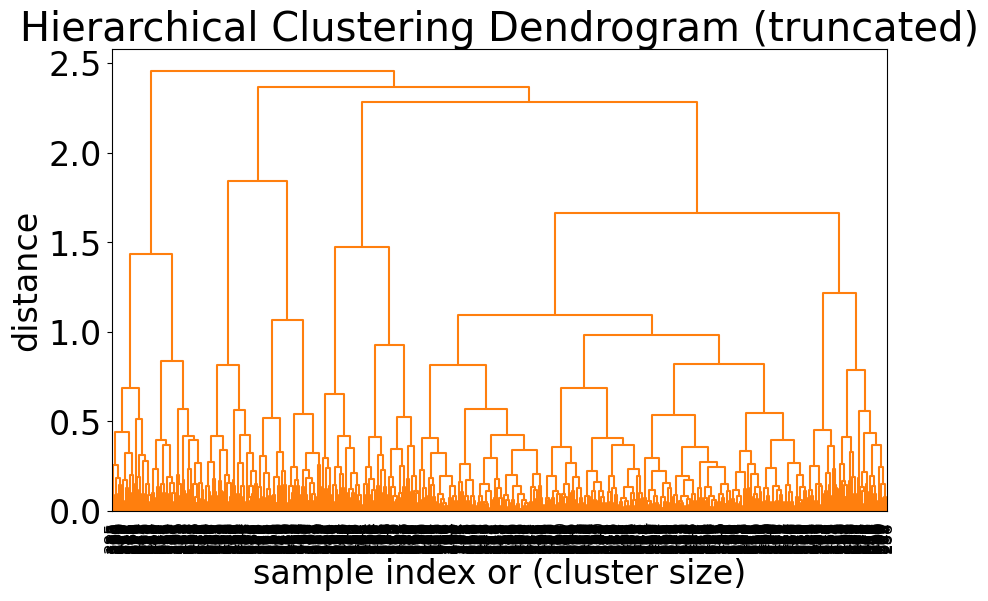

In [86]:
Z=linkage(X, method='complete', metric='euclidean')
max_d=7

plt.figure(figsize=(10, 6))
out=dendrogram_fancy(
    Z,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=max_d,
    max_d=max_d,  # plot a horizontal cut-off line
)

labxNew = fcluster(Z, max_d, criterion='distance')

### EXERCISE 6
If you cut the euclidean distance dendogram at 5.2 How many clusters do you obtain?

a) 3
<br>
b) 4
<br>
c) 5

[clustimage] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Set alpha based on density because of the parameter: [opaque]
[d3blocks] >INFO> Add density layer


Number of clusters: 5


[d3blocks] >INFO> Create scatterplot


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Messy data'}, xlabel='x-axis', ylabel='y-axis'>)

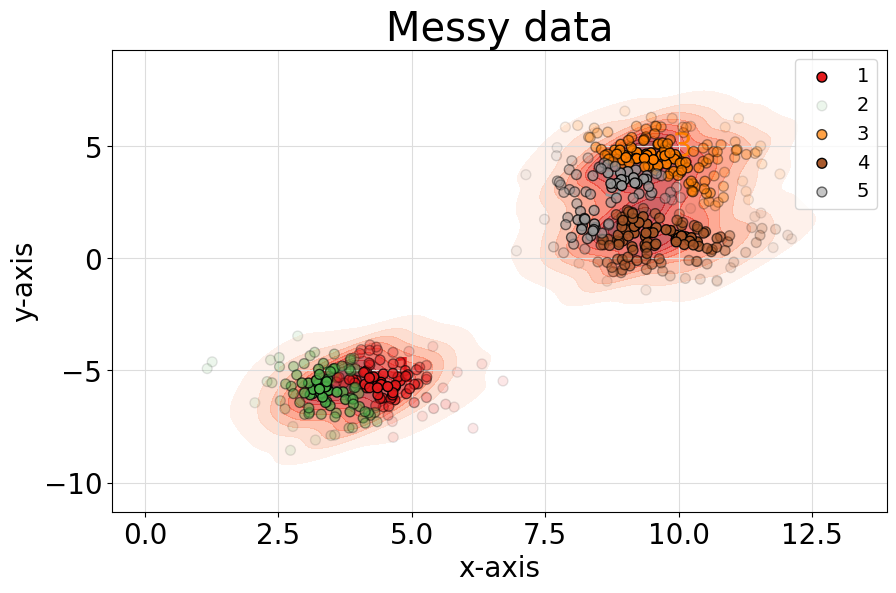

In [78]:
# ANSWER
labxNew = fcluster(Z, 5.2, criterion='distance')
print("Number of clusters: %d" %len(np.unique(labxNew)))

scatterd(
         x=X[:,0],
         y=X[:,1],
         figsize=(10, 6),
         title='Messy data',
         s=50,
         density=True,
         cmap='Set1',
         grid=True,
         labels=labxNew,
         #edgecolor='#FFFFFF',
         #gradient='#ffffff',
         )

### EXERCISE 7
Explain why selecting two clusters does not work to obtain the two underlying noisy clusters.


[clustimage] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Set alpha based on density because of the parameter: [opaque]
[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Exercise 7'}, xlabel='x-axis', ylabel='y-axis'>)

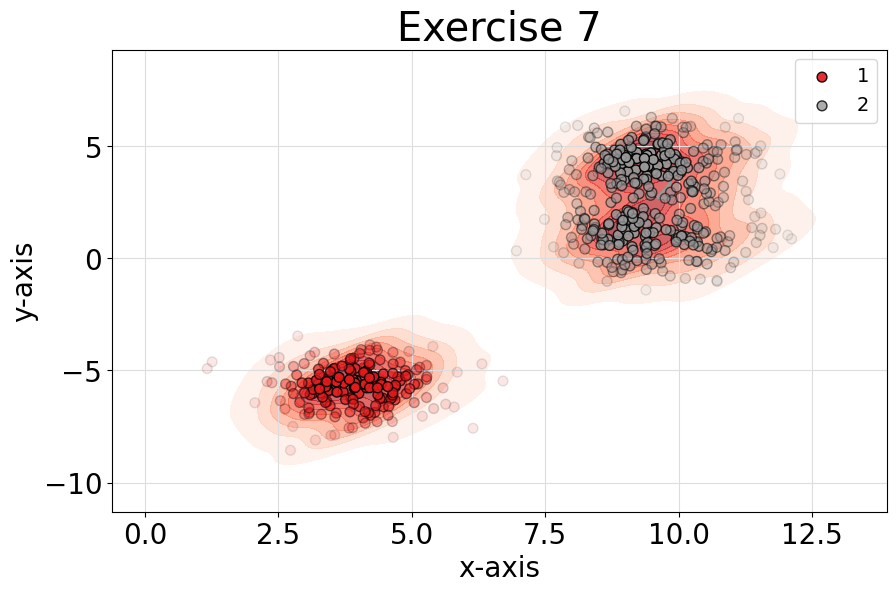

In [79]:
# ANSWER:
k=2
labxNew = fcluster(Z, k, criterion='maxclust')

scatterd(
         x=X[:,0],
         y=X[:,1],
         figsize=(10, 6),
         title='Exercise 7',
         s=50,
         density=True,
         cmap='Set1',
         grid=True,
         labels=labxNew,
         #edgecolor='#FFFFFF',
         #gradient='#ffffff',
         )

### EXERCISE 8
If you have outliers that you want to remove, which linkage type would you use to select and remove those?

a) Average
<br>
b) Complete
<br>
c) Single

### EXERCISE 9
Hierarchical clustering is also great in <b>non-spherical</b> data.
How would you cluster the underneath data? Suppose you want to capture the inner and seperately the outer circle.


[clustimage] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Set alpha based on density because of the parameter: [opaque]
[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Circles'}, xlabel='x-axis', ylabel='y-axis'>)

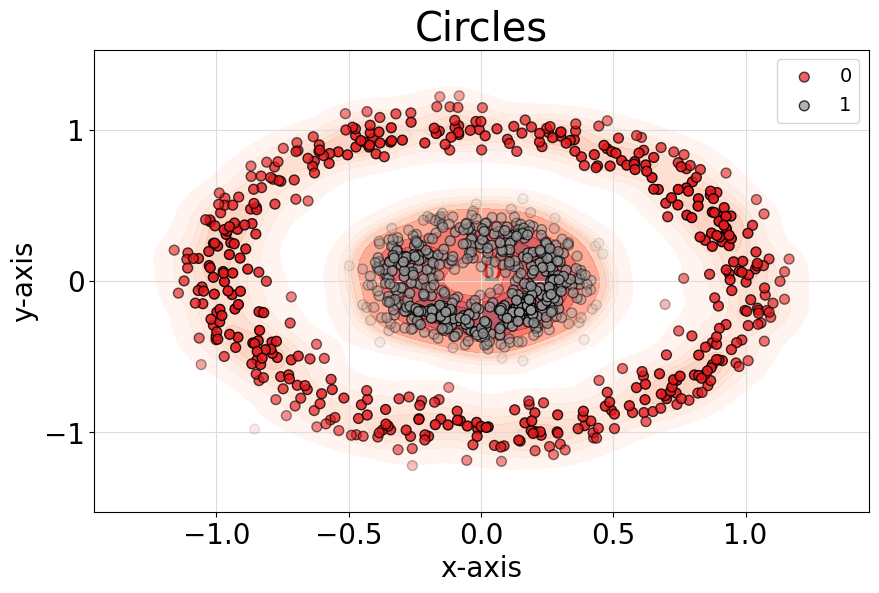

In [81]:
# Generate non-spherical data.
X, labx = make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=4)

# Plot the data distribution. (Here's another way to plot scatter graph)
scatterd(
         x=X[:,0],
         y=X[:,1],
         figsize=(10, 6),
         title='Circles',
         s=50,
         density=True,
         cmap='Set1',
         grid=True,
         labels=labx,
         #edgecolor='#FFFFFF',
         #gradient='#ffffff',
         )

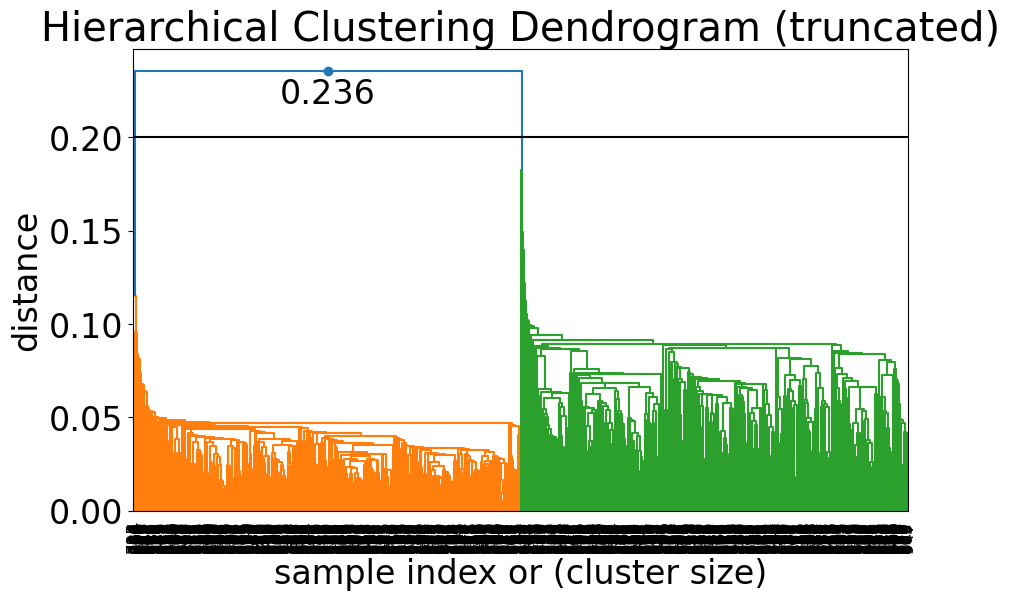

In [85]:
# SET LINKAGE TYPE
Z=linkage(X, method='single', metric='euclidean')
#Z=linkage(X, method='complete', metric='euclidean')
#Z=linkage(X, method='average', metric='euclidean')

max_d = 0.2
plt.figure(figsize=(10, 6))
out=dendrogram_fancy(
    Z,
    leaf_rotation=90,
    leaf_font_size=12,
    show_contracted=True,
    annotate_above=max_d,
    max_d=max_d,  # plot a horizontal cut-off line
)


[clustimage] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Add transparency to RGB colors (last column)
[d3blocks] >INFO> Set alpha based on density because of the parameter: [opaque]
[d3blocks] >INFO> Add density layer
[d3blocks] >INFO> Create scatterplot


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Circles'}, xlabel='x-axis', ylabel='y-axis'>)

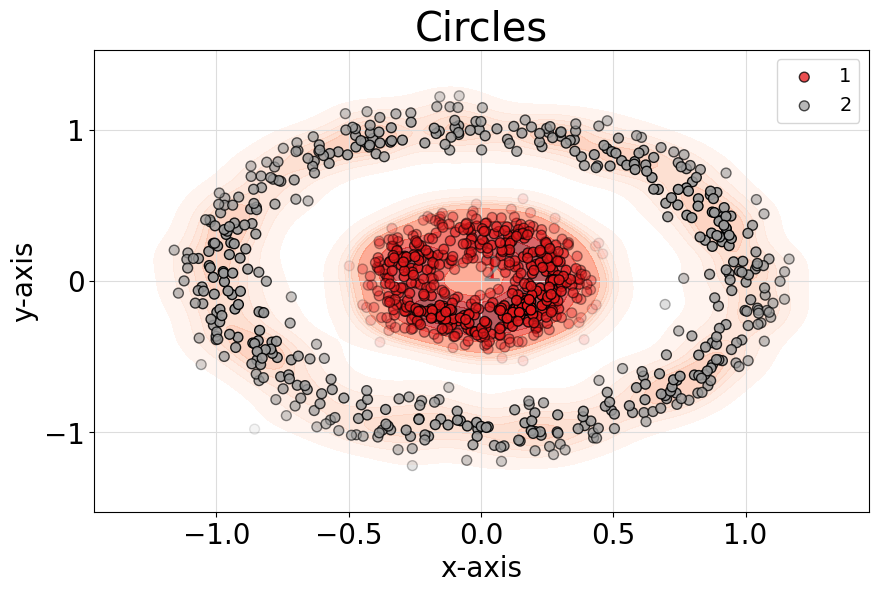

In [83]:
# ANSWER: WITH LINKAGE TYPE
labxNew = fcluster(Z, 2, criterion='maxclust')

scatterd(
         x=X[:,0],
         y=X[:,1],
         figsize=(10, 6),
         title='Circles',
         s=50,
         density=True,
         cmap='Set1',
         grid=True,
         labels=labxNew,
         #edgecolor='#FFFFFF',
         #gradient='#ffffff',
         )

In [ ]:
# Fin